In [1]:
from inda_mir.modeling.models import *
from inda_mir.modeling.evaluation import *
from inda_mir.modeling.train_test_split import load_data
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
features = ['pitch_instantaneous_confidence_mean',
 'spectral_centroid_dmean2',
 'barkbands_dmean2_26',
 'spectral_centroid_stdev',
 'spectral_rolloff_dmean',
 'barkbands_dmean2_24',
 'barkbands_max_26',
 'melbands96_max_86',
 'barkbands_stdev_26',
 'spectral_energy_dvar',
 'pitch_instantaneous_confidence_median',
 'barkbands_mean_12',
 'spectral_centroid_mean',
 'zerocrossingrate_dmean',
 'barkbands_dmean_25',
 'erbbands_median_0',
 'zerocrossingrate_dmean2',
 'zerocrossingrate_dvar2',
 'melbands_spread_median',
 'spectral_spread_mean',
 'barkbands_dmean_26',
 'spectral_contrast_coeffs_median_2',
 'mfcc_stdev_6',
 'melbands96_mean_78',
 'melbands_dvar2_6',
 'erbbands_spread_max',
 'spectral_flux_dmean2',
 'mfcc_median_1',
 'mfcc_mean_3',
 'melbands96_dmean_79',
 'spectral_kurtosis_dvar',
 'melbands96_dvar2_88',
 'erbbands_mean_0',
 'mfcc_median_2',
 'spectral_contrast_valleys_min_4',
 'erbbands_spread_dvar',
 'spectral_contrast_coeffs_mean_2',
 'spectral_contrast_coeffs_stdev_1',
 'melbands96_median_0',
 'gfcc_mean_1',
 'spectral_contrast_valleys_dvar2_5',
 'mfcc_min_6',
 'spectral_rms_dvar2',
 'melbands96_median_90',
 'mfcc_stdev_4',
 'spectral_contrast_valleys_stdev_5',
 'zerocrossingrate_max',
 'average_loudness',
 'mfcc_max_3',
 'zerocrossingrate_median',
 'loudness_ebu128_short_term_min']

In [55]:
data = load_data('/Users/itallosilva/Workspace/indaband/track_classifier/output-inda/train_test_split/random_split.data')

In [81]:
import pandas as pd
X_train, y_train = data.X_train[features].to_numpy(), data.y_train.to_numpy()
X_test, y_test = data.X_test[features].to_numpy(), data.y_test.to_numpy()
X = pd.concat([data.X_train, data.X_test])[features]

In [82]:
rf = RandomForestClassifier()
rf.fit(data.X_train[features], data.y_train)

In [119]:
explainer = shap.TreeExplainer(rf.model, shap.sample(X), feature_names=np.array(features), model_output="probability")
shap_values = explainer(X_test)

 99%|===================| 5062/5090 [00:50<00:00]        

In [120]:
s = [shap_values[:,:,i].values for i in range(5)]

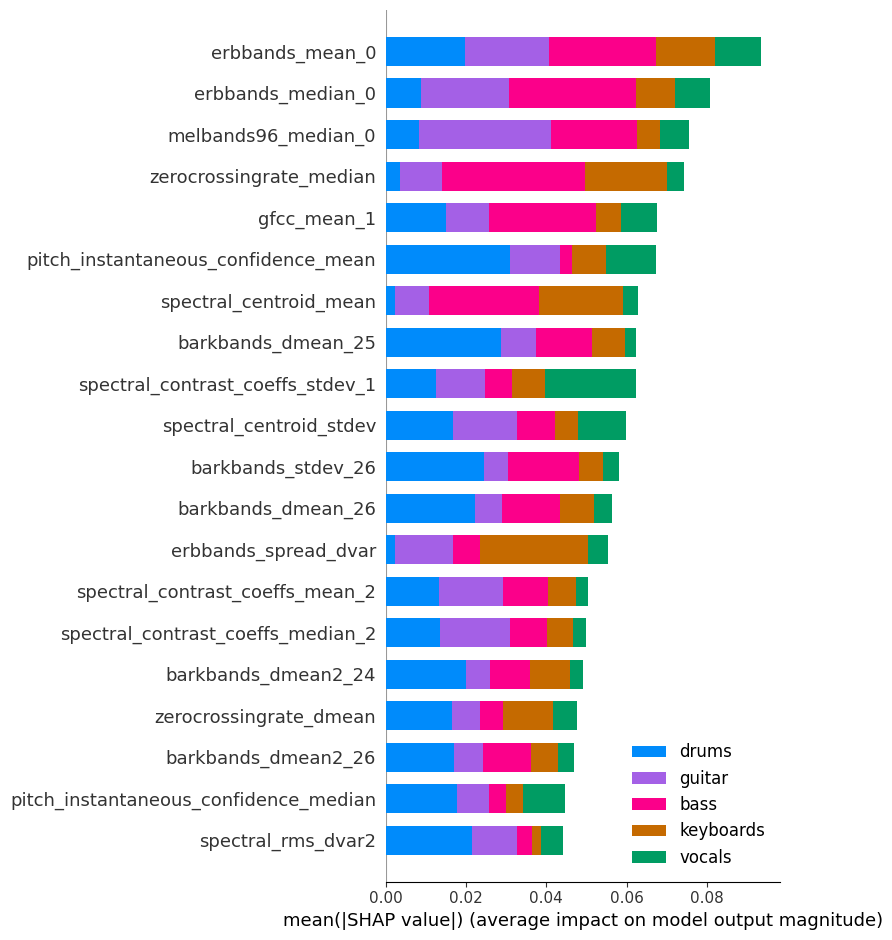

In [121]:
shap.summary_plot(s, X, class_names=data.labels, feature_names=np.array(features), plot_type="bar")

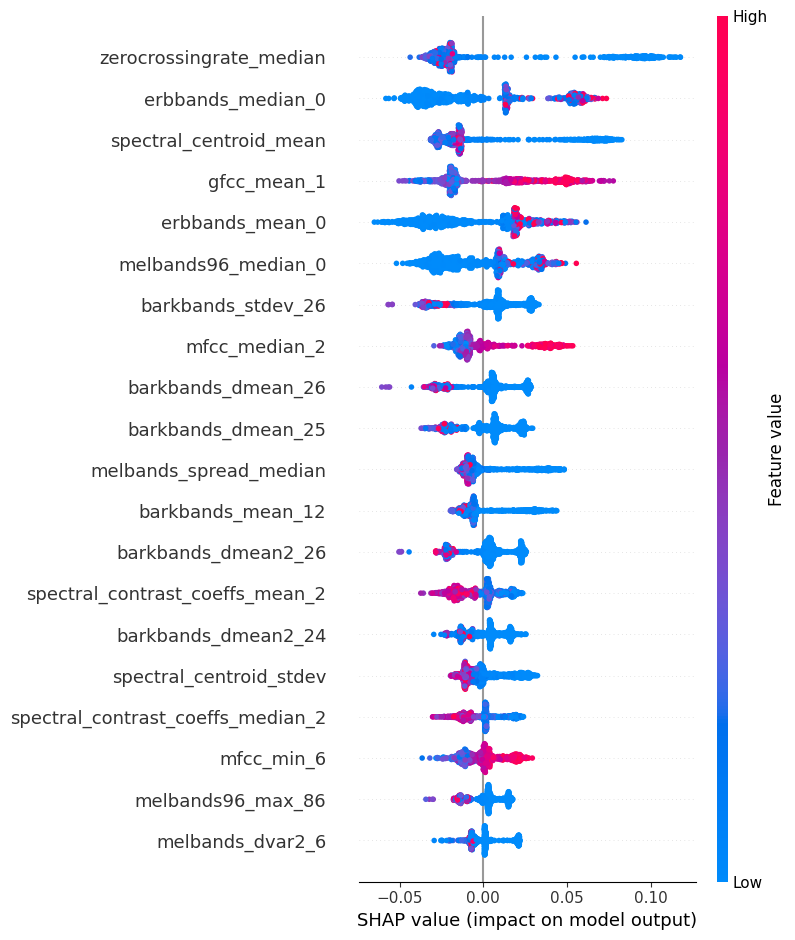

In [123]:
shap.summary_plot(s[0], X_test, class_names=data.labels, feature_names=np.array(features))

In [124]:
explainer.expected_value

array([0.2373, 0.294 , 0.2413, 0.1069, 0.1205])

In [175]:
data.y_test.values[564]

'vocals'

In [183]:
rf.predict(X_test)[564]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


'vocals'

In [186]:
i = 2
sample = 564
shap.force_plot(explainer.expected_value[i], s[i][sample], X_test[sample], feature_names = X.columns)